# Test Jarvis Patrick and SNN methods

In [1]:
import numpy as np
import scipy as sp
import sys
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import seaborn as sb

%matplotlib inline
%load_ext autoreload

In [2]:
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/src")
import mdutils
import myclusters
import mymetrics
%autoreload 2

In [3]:
from IPython.display import Image

## 1. JP: simple 2D

Basic Jarvis Patrick method. See Jarvis, R. A.; Patrick, E. A. Clustering Using a Similarity Measure Based on Shared Nearest Neighbors IEEE Trans. Comput. 1973, C22, 1025-1034.

Calculate the set of $K$ nearest neighbors for each structure. Note that the structure is set as its $0^{th}$ neighbor. Two structures cluster together if:
- they are in each others list of nearest neighbors
- they have at least $K_{min}$ of their $K$ nearest neighbors in common.

In [4]:
Xsimple = np.array((\
    (1,1),\
    (4,1),(5,2),(4.5,2.5),\
    (6,6),\
    (1,5),(1.5,6),(2,6.5)\
))

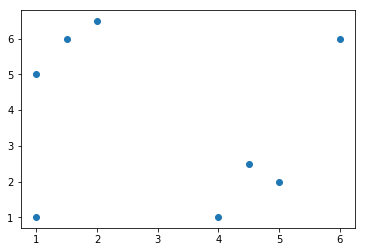

In [5]:
plt.scatter(Xsimple[:,0],Xsimple[:,1])

In [6]:
my_estimator = myclusters.jarvis_patrick(K=3,Kmin=2,debug=True)
ncl, nn, cl = my_estimator.do_clustering(X=Xsimple)
ncl, nn, cl

Ad. matrix
 [[1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 1 1]]


(2, 2, array([-1,  0,  0,  0, -1,  1,  1,  1]))

## 2 JP: 2D blobs, circles, moons

In [7]:
np.random.seed(0)
n_samples = 1500

nexample = 4
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons   = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs         = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure  = np.random.rand(n_samples, 2), None
#
DATA = list((noisy_circles,noisy_moons,blobs,no_structure))
for i in DATA:
    print(i[0].shape)

(1500, 2)
(1500, 2)
(1500, 2)
(1500, 2)


### 2.1 Circles, moons, blobs from scikit-learn

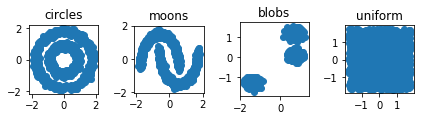

In [8]:
titles = ("circles","moons","blobs","uniform")
fig, axs = plt.subplots(1, 4)
for i in range(nexample):
    data = sklearn.preprocessing.StandardScaler().fit_transform(DATA[i][0])
    x = data[:,0]
    y = data[:,1]
    axs[i].scatter(x,y)
    axs[i].set_title(titles[i])
    axs[i].set_aspect('equal', 'box')
    DATA[i] = data
fig.tight_layout()

### 2.1.1 circles

In [9]:
X = DATA[0]
my_estimator = myclusters.jarvis_patrick(K=20,Kmin=3,debug=True)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

Ad. matrix
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


(2, 1, array([0, 0, 1, ..., 1, 0, 0]))

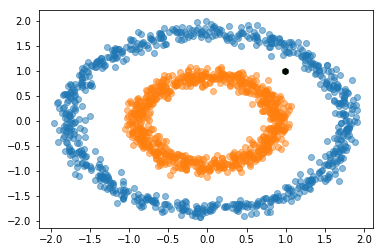

In [10]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')    

### 2.1.2 moons

In [11]:
X = DATA[1]
my_estimator = myclusters.jarvis_patrick(K=20,Kmin=3,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(2, 1, array([0, 1, 1, ..., 0, 0, 0]))

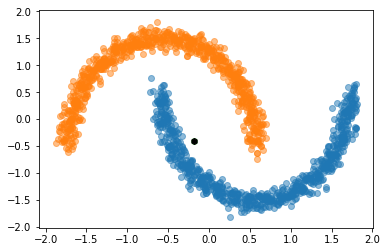

In [12]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')        

### 2.1.3 blobs

In [13]:
X = DATA[2]
my_estimator = myclusters.jarvis_patrick(K=20,Kmin=3,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(3, 1, array([0, 0, 0, ..., 0, 2, 2]))

In [14]:
(set(cl))

{-1, 0, 1, 2}

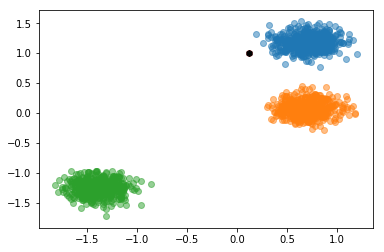

In [15]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')        

### 2.1.4 uniform

In [16]:
X = DATA[3]
my_estimator = myclusters.jarvis_patrick(K=20,Kmin=3,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(1, 0, array([0, 0, 0, ..., 0, 0, 0]))

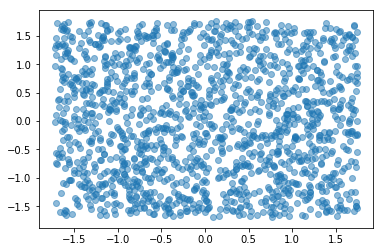

In [17]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')        

### 2.2 The Chameleon data set

from G. Karypis, E.H. Han, V. Kumar, CHAMELEON: A hierarchical 765 clustering algorithm using dynamic modeling, IEEE Trans. on Computers, 32 (8), 68-75, 1999

download from https://cs.joensuu.fi/sipu/datasets/

In [18]:
ch=np.loadtxt("ch.dat")
ch.shape

(8000, 2)

In [19]:
DCH = sp.spatial.distance.squareform(sp.spatial.distance.pdist(ch))

In [20]:
DCH.shape

(8000, 8000)

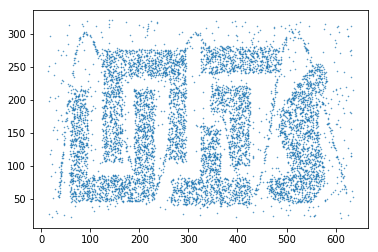

In [21]:
plt.scatter(ch[:,0],ch[:,1],alpha=0.75,s=0.3)

In [22]:
my_estimator = myclusters.jarvis_patrick(K=20,Kmin=13,metric='precomputed')
ncl, nn, cl = my_estimator.do_clustering(D=DCH)
ncl, nn

(20, 61)

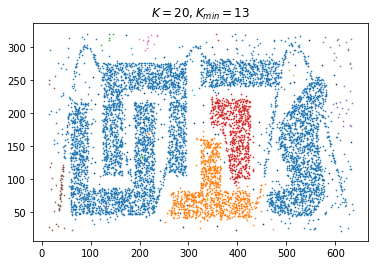

In [23]:
plt.title("$K=20, K_{min}=13$")
for i in set(cl):
    plt.scatter(ch[cl==i,0],ch[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),s=0.4)
plt.scatter(ch[cl==-1,0],ch[cl==-1,1],s=0.2,marker='h',c='k',alpha=0.5)

compare with https://rdrr.io/cran/dbscan/man/jpclust.html. Note that the R version **does not count the point itself** in a kNN list so k=12

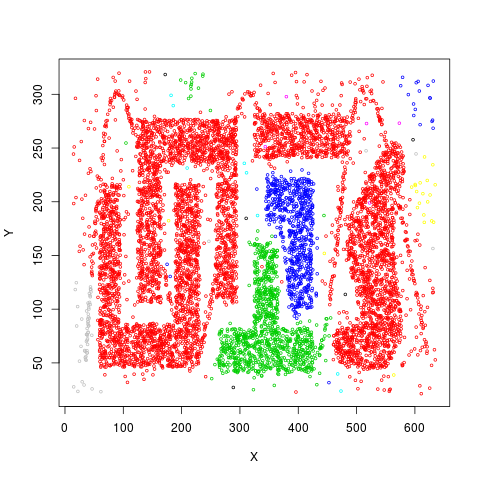

In [24]:
Image("ch_jp.png")

Check what happens with rdrr.io settings and using K=21

In [25]:
my_estimator = myclusters.jarvis_patrick(K=20,Kmin=12,metric='precomputed')
ncl, nn, cl = my_estimator.do_clustering(D=DCH)
ncl, nn

(10, 33)

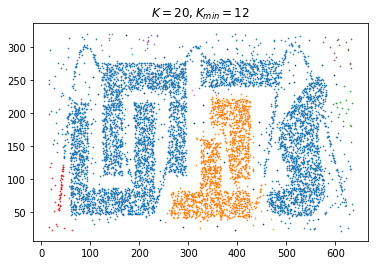

In [26]:
plt.title("$K=20, K_{min}=12$")
for i in set(cl):
    plt.scatter(ch[cl==i,0],ch[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),s=0.4)
plt.scatter(ch[cl==-1,0],ch[cl==-1,1],s=0.2,marker='h',c='k',alpha=0.5)

In [27]:
my_estimator = myclusters.jarvis_patrick(K=21,Kmin=13,metric='precomputed')
ncl, nn, cl = my_estimator.do_clustering(D=DCH)
ncl, nn

(10, 33)

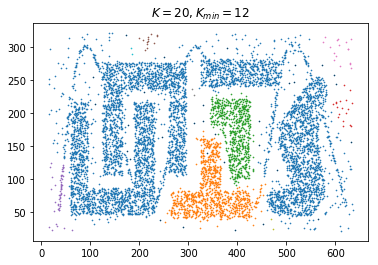

In [28]:
plt.title("$K=20, K_{min}=12$")
for i in set(cl):
    plt.scatter(ch[cl==i,0],ch[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),s=0.4)
plt.scatter(ch[cl==-1,0],ch[cl==-1,1],s=0.2,marker='h',c='k',alpha=0.5)

## 3.0 JP variant

see Brown and Martin (Brown, R. D.; Martin. Y. C. Use of Structure-Activity Data To Compare Structure-Based Clustering Methods and Descriptors for Use in Compound Selection J. Chem. Inf. Comput. Sci. 1996, 36, 572-584); the original algorithm has the following shortcomings:

- nearest neighbors of equal similarity to others already in the list maybe excluded because the list already has K elements; this may subdivide large clusters consisting similar molecules.
- it has the tendency to produce too many singletons, because in many cases similar structures have less than Kmin nearest neighbors in common.

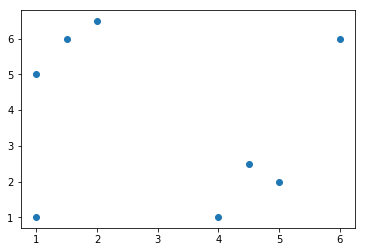

In [29]:
plt.scatter(Xsimple[:,0],Xsimple[:,1])

In [30]:
D = sp.spatial.distance.squareform(sp.spatial.distance.pdist(Xsimple))
D

array([[0.        , 3.        , 4.12310563, 3.80788655, 7.07106781,
        4.        , 5.02493781, 5.59016994],
       [3.        , 0.        , 1.41421356, 1.58113883, 5.38516481,
        5.        , 5.59016994, 5.85234996],
       [4.12310563, 1.41421356, 0.        , 0.70710678, 4.12310563,
        5.        , 5.31507291, 5.40832691],
       [3.80788655, 1.58113883, 0.70710678, 0.        , 3.80788655,
        4.30116263, 4.60977223, 4.71699057],
       [7.07106781, 5.38516481, 4.12310563, 3.80788655, 0.        ,
        5.09901951, 4.5       , 4.03112887],
       [4.        , 5.        , 5.        , 4.30116263, 5.09901951,
        0.        , 1.11803399, 1.80277564],
       [5.02493781, 5.59016994, 5.31507291, 4.60977223, 4.5       ,
        1.11803399, 0.        , 0.70710678],
       [5.59016994, 5.85234996, 5.40832691, 4.71699057, 4.03112887,
        1.80277564, 0.70710678, 0.        ]])

In [31]:
my_estimator = myclusters.brown_martin(T=2.,Rmin=0.5,debug=True)
ncl, nn, cl = my_estimator.do_clustering(X=Xsimple)
ncl, nn, cl

[array([0]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([4]), array([5, 6, 7]), array([5, 6, 7]), array([5, 6, 7])]
Ad. matrix
 [[1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 1 1]]


(2, 2, array([-1,  0,  0,  0, -1,  1,  1,  1]))

### 3.1 circles

In [32]:
X = DATA[0]

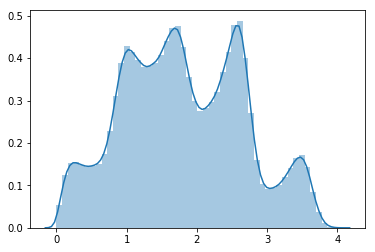

In [33]:
sb.distplot(sp.spatial.distance.pdist(X))

In [34]:
my_estimator = myclusters.brown_martin(T=0.5,Rmin=0.5,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(2, 0, array([0, 0, 1, ..., 1, 0, 0]))

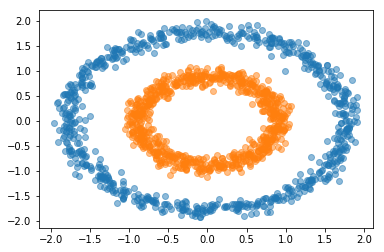

In [35]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')        

### 3.2 moons

In [36]:
X = DATA[1]
my_estimator = myclusters.brown_martin(T=0.5,Rmin=0.5,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(2, 0, array([0, 1, 1, ..., 0, 0, 0]))

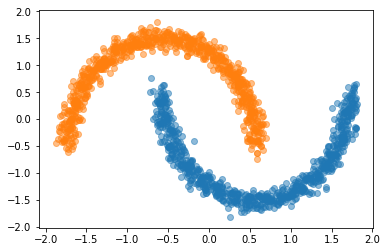

In [37]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')        

### 3.3 blobs

In [38]:
X = DATA[2]
my_estimator = myclusters.brown_martin(T=.5,Rmin=0.5,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(3, 0, array([0, 0, 0, ..., 0, 2, 2]))

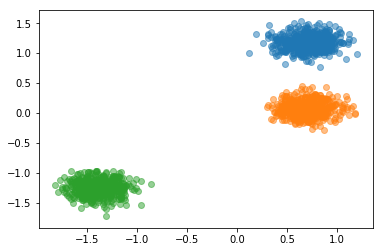

In [39]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')        

### 3.4 uniform

In [40]:
X = DATA[3]
my_estimator = myclusters.brown_martin(T=.5,Rmin=0.5,debug=False)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(1, 0, array([0, 0, 0, ..., 0, 0, 0]))

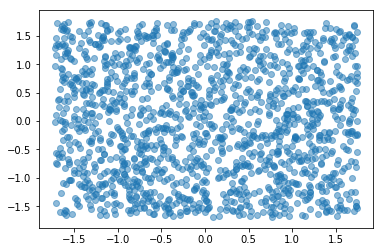

In [41]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')        

## 4 Shared Nearest Neighbors

Ertoz, L.; Steinbach, M.; Kumar, V. A New Shared Nearest Neighbor Clustering Algorithm and Its Applications. In Workshop on clustering high dimensional data and its applications  at 2nd SIAM international conference on data mining; 2002; pp 105–115.  

See https://rdrr.io/cran/dbscan/man/sNNclust.html and http://mlwiki.org/index.php/SNN_Clustering#SSN_Clustering_Algorithm  

### 4.1 circles

In [42]:
X = DATA[0]
my_estimator = myclusters.SNN(K=20,minPTS=5,epsilon=3)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(2, 1, array([0, 0, 1, ..., 1, 0, 0]))

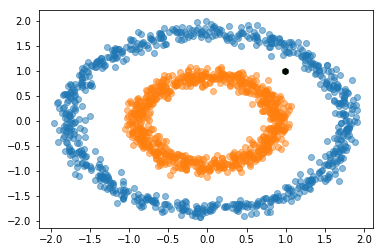

In [43]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')    

### 4.1 moons

In [44]:
X = DATA[1]
my_estimator = myclusters.SNN(K=20,minPTS=5,epsilon=3)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(2, 1, array([0, 1, 1, ..., 0, 0, 0]))

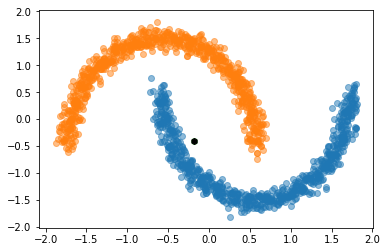

In [45]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')        

### 4.3 blobs

In [46]:
X = DATA[2]
my_estimator = myclusters.SNN(K=20,minPTS=5,epsilon=3)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(3, 3, array([0, 0, 0, ..., 0, 2, 2]))

In [47]:
(set(cl))

{-1, 0, 1, 2}

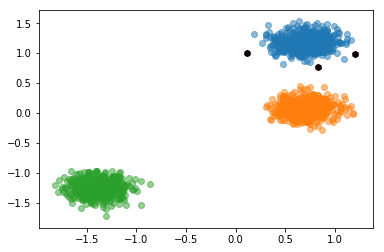

In [48]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')        

### 4.4 uniform

In [49]:
X = DATA[3]
my_estimator = myclusters.SNN(K=20,minPTS=5,epsilon=3)
ncl, nn, cl = my_estimator.do_clustering(X=X)
ncl, nn, cl

(1, 0, array([0, 0, 0, ..., 0, 0, 0]))

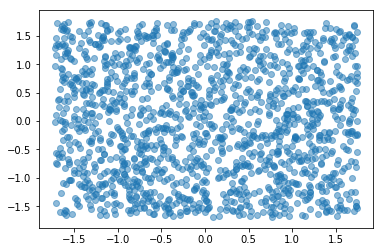

In [50]:
for i in set(cl):
    plt.scatter(X[cl==i,0],X[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[cl==-1,0],X[cl==-1,1],marker='h',c='k')        

### 4.5 Chameleon data set

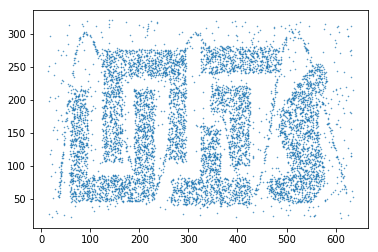

In [51]:
plt.scatter(ch[:,0],ch[:,1],alpha=0.75,s=0.3)

here, apply for $\epsilon$ the same procedure adopted for $K_{min}$ in JP clustering with respect to https://rdrr.io/cran/dbscan/man/sNNclust.html

In [53]:
my_estimator = myclusters.SNN(K=20,minPTS=16,epsilon=8,metric="precomputed")
ncl, nn, cl = my_estimator.do_clustering(D=DCH)
ncl, nn

(12, 242)

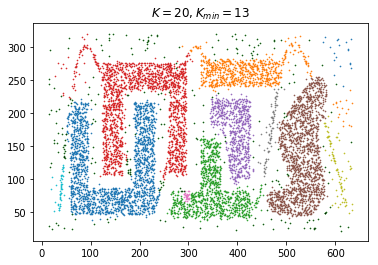

In [54]:
plt.title("$K=20, K_{min}=13$")
for i in set(cl):
    plt.scatter(ch[cl==i,0],ch[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),s=0.4)
plt.scatter(ch[cl==-1,0],ch[cl==-1,1],s=0.2,marker='h',c='k',alpha=0.5)

compare with https://rdrr.io/cran/dbscan/man/sNNclust.html

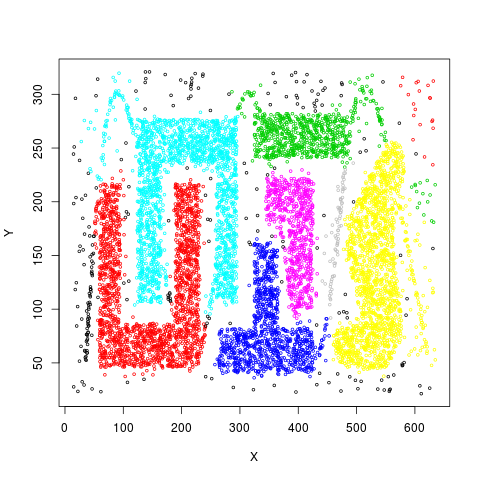

In [55]:
Image("ch_snn.png")

Check other parameter values

In [56]:
my_estimator = myclusters.SNN(K=20,minPTS=17,epsilon=8,metric="precomputed")
ncl, nn, cl = my_estimator.do_clustering(D=DCH)
ncl, nn

(17, 297)

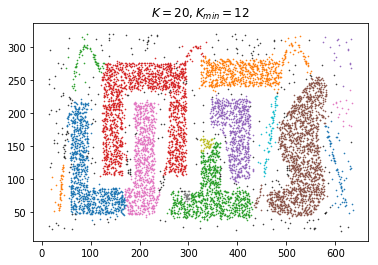

In [57]:
plt.title("$K=20, K_{min}=12$")
for i in set(cl):
    plt.scatter(ch[cl==i,0],ch[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),s=0.4)
plt.scatter(ch[cl==-1,0],ch[cl==-1,1],s=0.2,marker='h',c='k',alpha=0.5)

In [58]:
my_estimator = myclusters.SNN(K=21,minPTS=17,epsilon=8,metric="precomputed")
ncl, nn, cl = my_estimator.do_clustering(D=DCH)
ncl, nn

(12, 233)

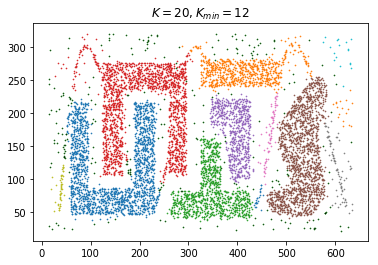

In [59]:
plt.title("$K=20, K_{min}=12$")
for i in set(cl):
    plt.scatter(ch[cl==i,0],ch[cl==i,1],cmap=plt.cm.get_cmap('RdBu'),s=0.4)
plt.scatter(ch[cl==-1,0],ch[cl==-1,1],s=0.2,marker='h',c='k',alpha=0.5)